In [326]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dir = 'D:/projects/datascience/bfu-ml-labs/lab_3.2_and_3.3'

In [327]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [328]:
df = iris.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [329]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [330]:
f1 = 'petal length (cm)'
f2 = 'petal width (cm)'

In [331]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[[f1, f2]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# 'ovr' даёт немного более высокую точность, чем 'multinomial' на датасете iris.
model = LogisticRegression(max_iter=200, multi_class='ovr', random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [332]:
mesh_f1, mesh_f2 = np.meshgrid(
    np.linspace(X_test[f1].min() - 1., X_test[f1].max() + 1., 1000),
    np.linspace(X_test[f2].min() - 1., X_test[f2].max() + 1., 1000)
)

mesh_X_test_data = np.c_[mesh_f1.ravel(), mesh_f2.ravel()]
mesh_X_test = pd.DataFrame(mesh_X_test_data, columns=[f1, f2])
mesh_X_test

,petal length (cm),petal width (cm)
0,0.100000,-0.9
1,0.107608,-0.9
2,0.115215,-0.9
3,0.122823,-0.9
4,0.130430,-0.9
...,...,...
999995,7.669570,3.3
999996,7.677177,3.3
999997,7.684785,3.3
999998,7.692392,3.3


In [333]:
mesh_y_pred = model.predict(mesh_X_test).reshape(mesh_f1.shape)

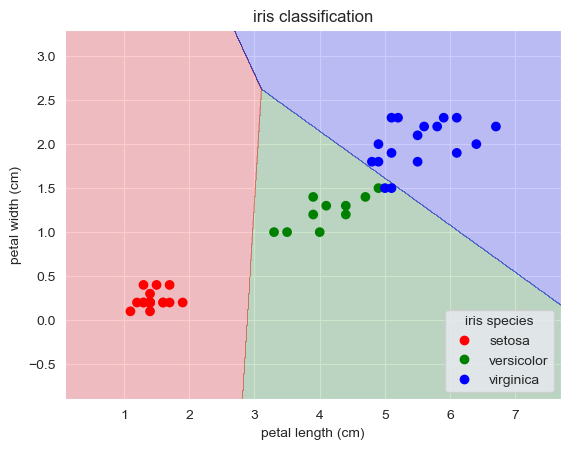

In [334]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green', 'blue'])

plt.contourf(mesh_f1, mesh_f2, mesh_y_pred, alpha=0.2, cmap=cmap)
scatter = plt.scatter(X_test[f1], X_test[f2], c=y_test, cmap=cmap)

plt.xlim(mesh_f1.min(), mesh_f1.max())
plt.ylim(mesh_f2.min(), mesh_f2.max())
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend(
    handles=scatter.legend_elements()[0],
    title='iris species',
    labels=iris.target_names.tolist(),
    loc='lower right'
)
plt.title('iris classification')

plt.show()